In [1]:
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft,fft2
from skimage import measure
import pywt

In [2]:
def rgb_gray(img):
    rgb = img[...,:3]
    if np.max(img)>1:
        rgb = rgb/255.0
    gray_img = np.dot(rgb[...,:3], [0.2989,0.5870,0.1140])
    plt.imshow(gray_img,cmap='gray')
    plt.show()
    return gray_img

def extract_fourier_coefficients(image):
    F = fft2(image)
    magnitude = np.abs(F)
    return magnitude

def extract_fourier_shape_descriptors(image):
    binary_image = image > np.mean(image)
    contours = measure.find_contours(binary_image, level=0.2)
    if len(contours) == 0:
        return np.array([])    
    contour = contours[0]
    complex_contour = contour[:, 0] + 1j * contour[:, 1]
    fourier_coeffs = fft(complex_contour)
    return np.abs(fourier_coeffs)

def extract_wavelet_features(image, wavelet='haar', level=1):
    coeffs = pywt.wavedec2(image, wavelet=wavelet, level=level)
    cA = coeffs[0]
    details = coeffs[1:]
    features = [cA.flatten()]
    for detail_level in details:
        for coeff in detail_level:
            features.append(coeff.flatten())
    return np.concatenate(features)

In [3]:
directory = "/kaggle/input/brats2020-training-data/BraTS2020_training_data/content/data"
h5_files = [f for f in os.listdir(directory) if f.endswith('.h5')]
h5_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.h5')]
h5_sample = [path for path in h5_files if path == '/kaggle/input/brats2020-training-data/BraTS2020_training_data/content/data/volume_100_slice_75.h5']
h5_array = np.array(h5py.File(h5_sample[0])['image'])

In [4]:
h5_array.shape

(240, 240, 4)

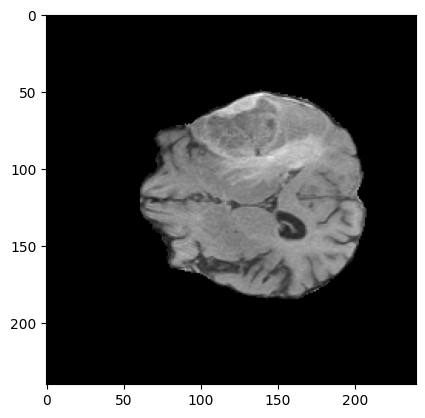

In [5]:
sample_gray = rgb_gray(h5_array)

Fourier Co-efficients

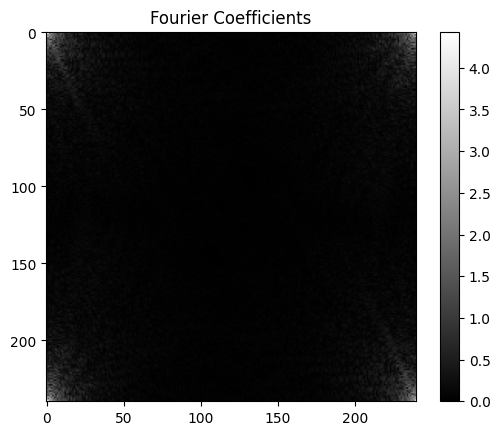

In [10]:
fourier_coeffs = extract_fourier_coefficients(sample_gray)

plt.imshow(np.log(fourier_coeffs+1), cmap='gray')
plt.title('Fourier Coefficients')
plt.colorbar()
plt.show()

shape descipters

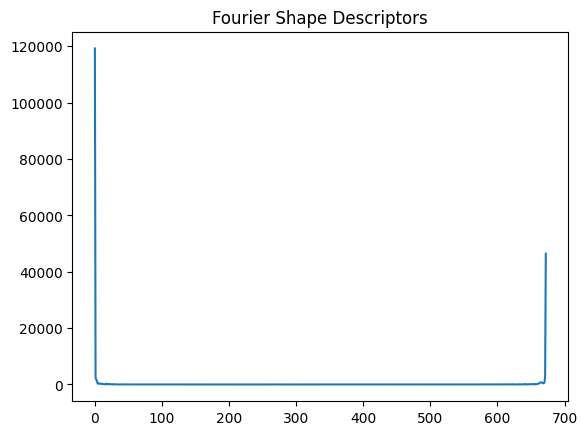

In [7]:
fourier_shape_descriptors = extract_fourier_shape_descriptors(sample_gray)
plt.plot(fourier_shape_descriptors)
plt.title('Fourier Shape Descriptors')
plt.show()

wavelets

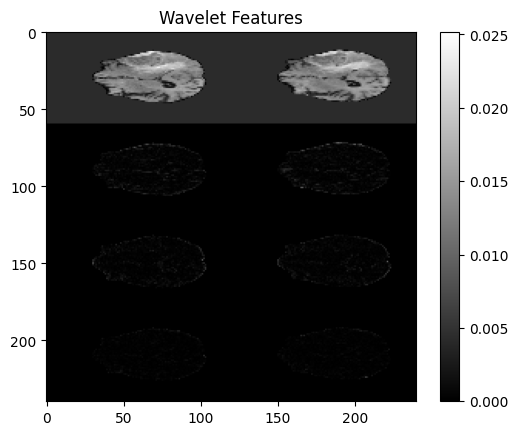

In [8]:
wavelet_features = extract_wavelet_features(sample_gray)

plt.imshow(np.log(np.abs(wavelet_features.reshape(240, 240)) + 1), cmap='gray')
plt.title('Wavelet Features')
plt.colorbar()
plt.show()